In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 19.66 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 22.4 MB/s eta 0:00:00


In [3]:
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
!nvidia-smi

Fri Nov 29 04:41:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
import os
import shutil

# Define source and destination directories
source_dir = '/content/drive/MyDrive/Colab_Notebooks/val2017'
destination_dir = '/content/dataset/images/train'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# List all files in the source directory
all_images = os.listdir(source_dir)

# Ensure the number of files in the source directory is sufficient
if len(all_images) < 100:
    print("Not enough images in the source directory.")
else:
    # Select the first 100 images
    selected_images = all_images[:100]

    # Copy selected images to the destination directory
    for image in selected_images:
        shutil.copy(os.path.join(source_dir, image), os.path.join(destination_dir, image))

    print(f"Copied {len(selected_images)} images to {destination_dir}")

Copied 100 images to /content/dataset/images/train


In [13]:
import os
import json
from PIL import Image

# Define paths
images_dir = '/content/dataset/images/train'  # Directory with 100 images
annotations_file = '/content/drive/MyDrive/Colab_Notebooks/instances_val2017.json/instances_val2017.json'  # COCO annotations file
output_dir = '/content/dataset/labels/train'  # Directory to save YOLO annotations

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Load COCO annotations
with open(annotations_file, 'r') as f:
    coco_data = json.load(f)

# Build a mapping from image IDs to file names
image_id_to_filename = {img["id"]: img["file_name"] for img in coco_data["images"]}

# Build a mapping from image IDs to their annotations
image_id_to_annotations = {}
for ann in coco_data["annotations"]:
    img_id = ann["image_id"]
    bbox = ann["bbox"]  # [x, y, width, height]
    category_id = ann["category_id"]
    if img_id not in image_id_to_annotations:
        image_id_to_annotations[img_id] = []
    image_id_to_annotations[img_id].append({"bbox": bbox, "category_id": category_id})

# Process only the 100 selected images
for image_file in os.listdir(images_dir):
    image_path = os.path.join(images_dir, image_file)
    if image_file.endswith(('.jpg', '.png')):  # Only process image files
        # Get the image ID from its filename
        img_id = next((id for id, file in image_id_to_filename.items() if file == image_file), None)
        if img_id is None:
            print(f"No annotations found for {image_file}")
            continue

        # Open the image to get its dimensions
        with Image.open(image_path) as img:
            image_width, image_height = img.size

        # Get annotations for the image
        annotations = image_id_to_annotations.get(img_id, [])

        # Create a YOLO-format annotation file
        yolo_annotation_path = os.path.join(output_dir, os.path.splitext(image_file)[0] + '.txt')
        with open(yolo_annotation_path, 'w') as f:
            for ann in annotations:
                # Normalize bounding box
                x, y, width, height = ann["bbox"]
                x_center = (x + width / 2) / image_width
                y_center = (y + height / 2) / image_height
                norm_width = width / image_width
                norm_height = height / image_height

                # Write in YOLO format
                f.write(f"{ann['category_id']} {x_center} {y_center} {norm_width} {norm_height}\n")

        print(f"Processed {image_file}")

print("YOLO conversion complete.")


Processed 000000463542.jpg
Processed 000000465675.jpg
Processed 000000471087.jpg
Processed 000000468245.jpg
Processed 000000469828.jpg
Processed 000000463618.jpg
Processed 000000462728.jpg
Processed 000000471991.jpg
Processed 000000465549.jpg
Processed 000000466256.jpg
Processed 000000469652.jpg
Processed 000000470773.jpg
Processed 000000466835.jpg
Processed 000000466986.jpg
Processed 000000464689.jpg
Processed 000000470173.jpg
Processed 000000466156.jpg
Processed 000000465180.jpg
Processed 000000463283.jpg
Processed 000000463037.jpg
Processed 000000467315.jpg
Processed 000000462371.jpg
Processed 000000466085.jpg
Processed 000000474028.jpg
Processed 000000467776.jpg
Processed 000000468332.jpg
Processed 000000462614.jpg
Processed 000000469067.jpg
Processed 000000468965.jpg
Processed 000000464522.jpg
Processed 000000472623.jpg
Processed 000000468925.jpg
Processed 000000468632.jpg
Processed 000000463174.jpg
Processed 000000469246.jpg
Processed 000000474039.jpg
Processed 000000474170.jpg
P

In [14]:
# Create a train.txt file listing all image paths
with open('train.txt', 'w') as f:
    for image_file in os.listdir(images_dir):
        if image_file.endswith(('.jpg', '.png')):
            f.write(f"{os.path.abspath(os.path.join(images_dir, image_file))}\n")

In [18]:
import os

# Path to labels directory
labels_dir = '/content/dataset/labels/train'
valid_classes = range(90)  # Adjust based on nc value in data.yaml

for label_file in os.listdir(labels_dir):
    file_path = os.path.join(labels_dir, label_file)
    with open(file_path, 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            if class_id not in valid_classes:
                print(f"Invalid label {class_id} in file {label_file}")


Invalid label 90 in file 000000465179.txt
Invalid label 90 in file 000000465179.txt


In [20]:
!rm /content/dataset/images/train/000000465179.jpg
!rm /content/dataset/labels/train/000000465179.txt

In [21]:
import os

labels_dir = '/content/dataset/labels/train'
valid_classes = range(90)  # Adjust based on your nc value

for label_file in os.listdir(labels_dir):
    file_path = os.path.join(labels_dir, label_file)
    with open(file_path, 'r') as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            if class_id not in valid_classes:
                print(f"Invalid label {class_id} in file {label_file}")

In [22]:
!python train.py --img 640 --batch 16 --epochs 10 --data /content/dataset/data.yaml --weights yolov5s.pt --cache

2024-11-29 05:36:24.582513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-29 05:36:24.602136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-29 05:36:24.608158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_

In [24]:
!python val.py --weights runs/train/exp6/weights/best.pt --data /content/dataset/data.yaml --img-size 640 --batch-size 16

val: data=/content/dataset/data.yaml, weights=['runs/train/exp6/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7252855 parameters, 0 gradients, 16.5 GFLOPs
val: Scanning /content/dataset/labels/train.cache... 99 images, 0 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/7 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:06<00:00,  1.14it/s]
                   all         99        889    0.005

In [40]:
!python detect.py --weights runs/train/exp6/weights/best.pt --img 640 --source /content/cat1.jpg

detect: weights=['runs/train/exp6/weights/best.pt'], source=/content/cat1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7252855 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/cat1.jpg: 448x640 (no detections), 31.3ms
Speed: 0.5ms pre-process, 31.3ms inference, 54.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Results: image 1/1: 576x768 1 bicycle, 1 car, 1 dog
Speed: 2.2ms pre-process, 9.9ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
Boxes: [[     133.72      217.12      308.86      544.17     0.89287          16]
 [     471.13      75.324      687.93      172.76     0.75923           2]
 [     150.79      118.14      568.47      426.08     0.48551           1]]


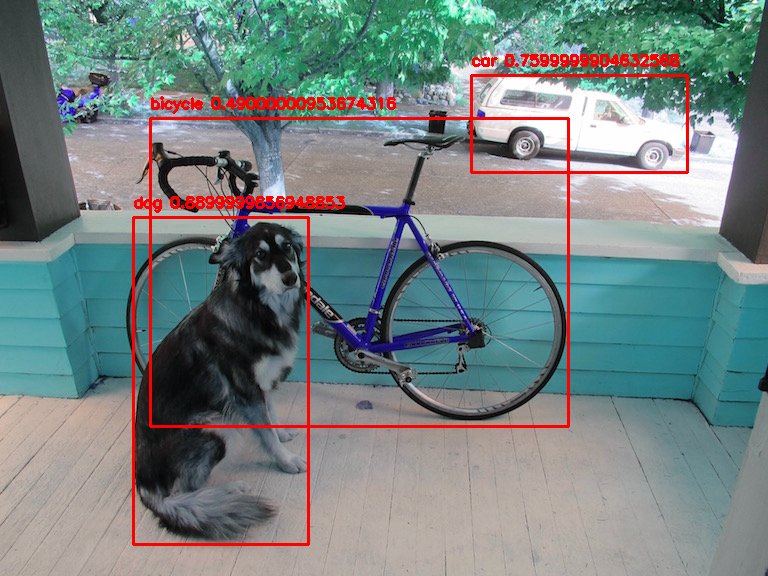

In [48]:
import cv2
import torch
from google.colab.patches import cv2_imshow

# Load the YOLOv5 model (use your trained model or pre-trained)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load your custom model

# Load an image
img_path = '/content/dog_bike_car.jpg'  # Change to the image path you want to use
img = cv2.imread(img_path)

# Convert the image from BGR to RGB (YOLOv5 expects RGB images)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inference (Run model on the image)
results = model(img_rgb)

# Check the results to debug
print("Results:", results)  # Check the result object to see if it's parsed properly

# Parse results: results.xyxy contains [x1, y1, x2, y2, confidence, class]
boxes = results.xyxy[0].cpu().numpy()  # Bounding boxes (in xyxy format)
print("Boxes:", boxes)  # Check the bounding boxes

# Loop through all detected objects and draw bounding boxes
for box in boxes:
    x1, y1, x2, y2, conf, cls = box  # Extract coordinates, confidence, and class ID
    label = results.names[int(cls)]  # Get label name
    confidence = round(conf, 2)  # Round confidence score

    # Draw the bounding box (color: Blue in this case)
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue box

    # Put label and confidence score on the image
    cv2.putText(img, f'{label} {confidence}',
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 0, 0), 2)  # Text label

# Show the image with bounding boxes and labels (use cv2_imshow for Colab)
cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display in Colab
